In [1]:
import pymatgen.analysis.solar.slme as slme
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Repeat over a range of thickness
thickness = np.logspace(-8, -3, 100, endpoint=True)
thickness_nm = thickness*1000000000

In [3]:
material1 = {
    "Br1I11": {
        "dir": 2.277,   # Direct bandgap value
        "indir": 2.277, # Indirect bandgap value
        "folder": "./", # Path to the folder that have all the required file
    },
    
  } 

In [4]:
for material1, material_data1 in material1.items():
    data1 = np.loadtxt(material_data1["folder"] + '/absorption_0.22.dat', delimiter=' ')
    energy1 = data1[:,0]
    alpha_cm1 = data1[:,1]
    effSlm1 = []

In [5]:
for i in thickness:
    eff1 = data1 = slme.slme(energy1,alpha_cm1,material_data1["dir"],material_data1["indir"],thickness=i,absorbance_in_inverse_centimeters=True)
    effSlm1.append(eff1)

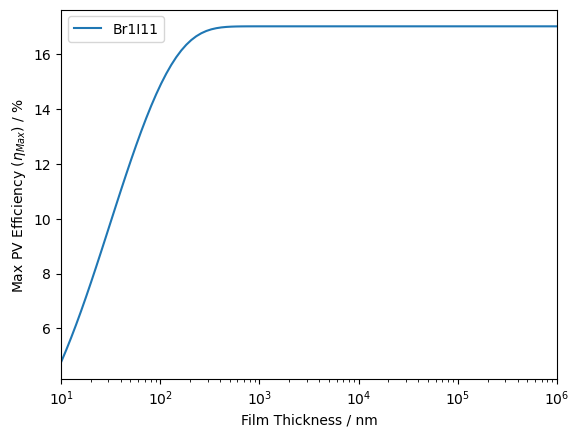

In [6]:
ax = plt.axes()

plt.plot(thickness_nm, effSlm1, label = 'Br1I11')

# Format your own plot
plt.xscale('log')
plt.margins(x=0)
plt.xlabel('Film Thickness / nm')
plt.ylabel('Max PV Efficiency $(\\eta_{Max})$ / % ')
plt.legend()

# plt.savefig('path_to_your_folder', format='pdf')